# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('/Users/tylermeester/School/11 - Frequentist Case Study/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical_charges = pd.DataFrame(medical.charges)

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean charge is 13270.422265141257, and the standard error is 12110.011236693994, standard error is used instead of standard deviation because this is a sample of the population that we are trying to describe. Because of this, standard error was calculated with 1 degree of freedom to remove bias. From the histogram we can see that there is not much of a pattern. 

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

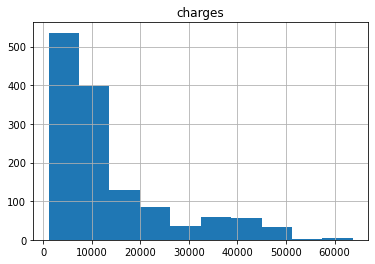

In [5]:
medical_charges.hist()

In [6]:
charges_mean = medical.charges.mean()
charges_mean

13270.422265141257

In [7]:
charges_std_error = np.std(medical.charges, ddof = 1)
charges_std_error

12110.011236693994

In [8]:
medical_charges.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ First and foremost, the administrator's question is possible to answer because the sample size of 1,338 is large enough to make conclusions about the population parameters. We will resample this original sample numerous times to find the population paramaters. We want to find the population mean, standard deviation, and confidence intervals to assess whether there's a statistical likelihood that \\$12,000 could be the population's average medical charge.

### Exploring the original sample

In [9]:
#Mean of the original sample
sample1_mean = np.mean(medical_charges)
sample1_mean

charges    13270.422265
dtype: float64

In [10]:
#Standard deviation of original sample
sample1_std_dev = np.std(medical_charges)
sample1_std_dev

charges    12105.484976
dtype: float64

In [11]:
#Size of original sample
sample1_n = medical_charges.count()
sample1_n

charges    1338
dtype: int64

In [12]:
#Standard Error for the original sample. n-1 is used because it is a sample and not the population.
sample1_std_error = sample1_std_dev/(np.sqrt(sample1_n - 1))
sample1_std_error

charges    331.067454
dtype: float64

In [13]:
#Z Score for .025/.975 (95%) confidence interval
z_score = round(norm.ppf(.975),2)
z_score

1.96

In [14]:
#Manual calculation of lower limit of 95% confidence interval for original sample.
sample1_lower_ci = sample1_mean - (1.96 * sample1_std_error)
sample1_lower_ci

charges    12621.530055
dtype: float64

In [15]:
#Manual calculation of upper limit of 95% confidence interval for original sample.
sample1_upper_ci = sample1_mean + (1.96 * sample1_std_error)
sample1_upper_ci

charges    13919.314476
dtype: float64

In [16]:
#95% confidence interval
sample1_confidence_interval = norm.interval(alpha = .95, loc = sample1_mean, scale = sample1_std_error)
sample1_confidence_interval

(array([12621.54197823]), array([13919.30255205]))

### Resampling the Original Sample 1000 Times

In [17]:
#Function to resample the original sample n number of times.
def charges_sampler(n):
    return np.random.choice(medical.charges, n)

In [18]:
#Resample 1000 times
charges_sample1000 = charges_sampler(1000)

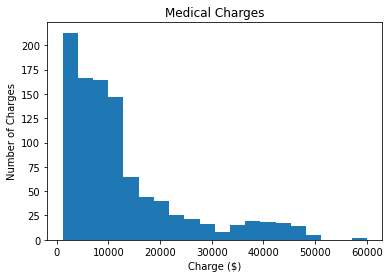

In [19]:
_ = plt.hist(charges_sample1000, bins=20)
_ = plt.xlabel('Charge ($)')
_ = plt.ylabel('Number of Charges')
_ = plt.title('Medical Charges')

In [20]:
pd.DataFrame(charges_sample1000).describe()

,0
count,1000.000000
mean,12552.107107
std,11390.419204
min,1121.873900
25%,4523.273350
50%,9076.899275
75%,15398.873437
max,60021.398970


In [21]:
#Resample x1000 mean
sample1000_mean = np.mean(charges_sample1000)
sample1000_mean

12552.107106548001

In [22]:
#Resample x1000 standard deviation
sample1000_std_dev = np.std(charges_sample1000)
sample1000_std_dev

11384.72256995844

In [23]:
#Resample x1000 size
sample1000_n = len(charges_sample1000)
sample1000_n

1000

In [24]:
#Resample x1000 standard error 
sample1000_std_error = sample1000_std_dev/(np.sqrt(sample1000_n - 1))
sample1000_std_error

360.19668188999975

In [25]:
#95% Confidence interval
sample1000_confidence_interval = norm.interval(alpha = .95, loc = sample1000_mean, scale = sample1000_std_error)
sample1000_confidence_interval

(11846.13458269277, 13258.079630403232)

In [26]:
norm.cdf(12000, sample1000_mean, sample1000_std_error)

0.06266338030072198

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.


__A:__ 
Becuse the sample distribution of means can be described with a normal distribution and we might want to detect changes on both sides, it is more appropriate to use a two-sided interval for the confidence interval. -- Because we want to detect changes on one end of the sample it is best to use a one sided interval

The population mean, as derived from the sample distribution of means, is __\\$13264.65__.

The 95% confidence interval is __\\$12515.5316449352 - \\$14013.769216189121__. 

\\$12,000 does not fall within the 95% confidence interval, __this tells us that it is unlikely that the average hospital charge is \\$12,000 or less__, as the administrator fears. 

We can determine the actual chance of the population mean being  \\$12,000 by using a Cumulative Distribution Function (CDF). Doing this tells us that __there is a 0.046%  chance that the mean charge of the population is ≤ $12,000__. It is safe to say that the administrator does not need to be concerned.




### Creating the Sample Distribution of the Mean

In [27]:
#Create a list with the mean of each resample
mean_list = []
for i in range(1000):
    mean_list.append(np.mean(charges_sampler(1000)))

#Create a list with the standard deviation of each resample
std_dev_list = []
for i in range(1000):
    std_dev_list.append(np.std(charges_sampler(1000)))
    
#Create a list with the standard error of each resample
std_error_list = []
for x in std_dev_list:
    std_error_list.append(x/(np.sqrt(sample1000_n - 1)))

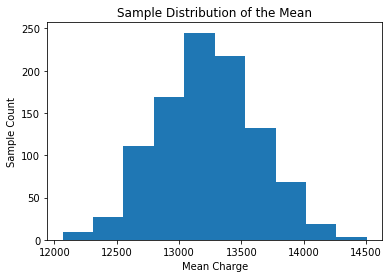

In [28]:
_ = plt.hist(mean_list)
_ = plt.xlabel('Mean Charge')
_ = plt.ylabel('Sample Count')
_ = plt.title('Sample Distribution of the Mean')

In [29]:
#This is the mean of the sample distribution
sample_distribution_mean = np.mean(mean_list)
sample_distribution_mean
print('Mean of the Sample Distribution of Means: ' + str(sample_distribution_mean))


#This is the mean of the original sample for comparison
original_sample_mean = np.mean(medical.charges)
print('Original Sample Mean: ' + str(original_sample_mean))

Mean of the Sample Distribution of Means: 13229.696730644348
Original Sample Mean: 13270.422265141257


In [30]:
#The average standard deviation of sample distribution
sample_distribution_std_dev_mean = np.mean(std_dev_list)
print('Mean Standard Deviation of the Sample Distribution: ' +str(sample_distribution_std_dev_mean))


#Sample distribution size
sample_distribution_n = len(mean_list)
print('Size of Sample Distribution: ' +str(sample_distribution_n))


#Sample distribution standard error 
sample_distribution_std_error = sample_distribution_std_dev_mean/(np.sqrt(sample_distribution_n - 1))
print('Standard Error of Sample Distribution: ' + str(sample_distribution_std_error))



Mean Standard Deviation of the Sample Distribution: 12085.010759952425
Size of Sample Distribution: 1000
Standard Error of Sample Distribution: 382.3528197187943


In [31]:
#95% Confidence interval
sample_distribution_confidence_interval = norm.interval(alpha = .95, loc = sample_distribution_mean, scale = sample_distribution_std_error)
print('Confidence Interval: $12515.5316449352 - $14013.769216189121')

Confidence Interval: $12515.5316449352 - $14013.769216189121


In [32]:
#Percent liklihood that $12,000 is the mean charge of the population
perc_12000 = norm.cdf(12000, sample_distribution_mean, sample_distribution_std_error)
print('Percent chance that the mean charge of the population is ≤ $12,000: ' + str(round((perc_12000 * 100), 3)) + '%')

Percent chance that the mean charge of the population is ≤ $12,000: 0.065%


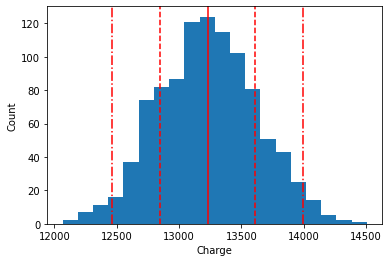

In [33]:
_ = plt.hist(mean_list, bins = 20)
_ = plt.xlabel('Charge')
_ = plt.ylabel('Count')
_ = plt.axvline(sample_distribution_mean, color='r')
_ = plt.axvline(sample_distribution_mean+sample_distribution_std_error, color='r', linestyle='--')
_ = plt.axvline(sample_distribution_mean-sample_distribution_std_error, color='r', linestyle='--')
_ = plt.axvline(sample_distribution_mean+(sample_distribution_std_error * 2), color='r', linestyle='-.')
_ = plt.axvline(sample_distribution_mean-(sample_distribution_std_error * 2), color='r', linestyle='-.')


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis: There is no difference in the amount charged between people with insurance and people without insurance.

Alternative Hypothesis: There is a difference in the amount charged between people with insurance and people without insurance.

By using the t-test we are assuming that the variances of the two groups are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [34]:
medical_insurance_charges = pd.DataFrame(medical[['charges', 'insuranceclaim']])

In [50]:
insurance_charges = medical_insurance_charges[medical_insurance_charges['insuranceclaim'] == 1]
insurance_charges = insurance_charges.reset_index().drop('index', axis = 1)

#Function to resample the original sample n number of times.
def insurance_charges_sampler(n):
    return np.random.choice(insurance_charges.charges, n)

In [51]:
no_insurance_charges = medical_insurance_charges[medical_insurance_charges['insuranceclaim'] == 0]
no_insurance_charges = no_insurance_charges.reset_index().drop('index', axis = 1)

#Function to resample the original sample n number of times.
def no_insurance_charges_sampler(n):
    return np.random.choice(no_insurance_charges.charges, n)

Mean of the Sample Distribution of Means with Insurance: 16428.696461456453
Mean Standard Deviation of the Sample Distribution with Insurance: 14019.464835560713
Size of Sample Distribution with Insurance: 1000
Standard Error of Sample Distribution with Insurance: 443.55623816144816
Confidence Interval: (15559.342209541945, 17298.05071337096)


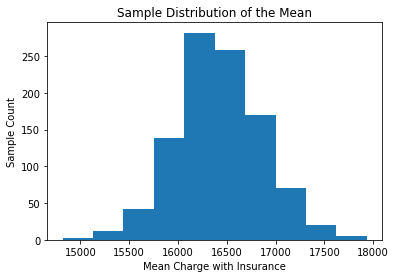

In [37]:
#Create a list with the mean of each resample
insurance_mean_list = []
for i in range(1000):
    insurance_mean_list.append(np.mean(insurance_charges_sampler(1000)))

#Create a list with the standard deviation of each resample
insurance_std_dev_list = []
for i in range(1000):
    insurance_std_dev_list.append(np.std(insurance_charges_sampler(1000)))
    
#Create a list with the standard error of each resample
insurance_std_error_list = []
for x in insurance_std_dev_list:
    std_error_list.append(x/(np.sqrt(sample1000_n - 1)))
    

_ = plt.hist(insurance_mean_list)
_ = plt.xlabel('Mean Charge with Insurance')
_ = plt.ylabel('Sample Count')
_ = plt.title('Sample Distribution of the Mean')
    

#This is the mean of the sample distribution
insurance_sample_distribution_mean = np.mean(insurance_mean_list)
insurance_sample_distribution_mean
print('Mean of the Sample Distribution of Means with Insurance: ' + str(insurance_sample_distribution_mean))


#The average standard deviation of sample distribution
insurance_sample_distribution_std_dev_mean = np.mean(insurance_std_dev_list)
print('Mean Standard Deviation of the Sample Distribution with Insurance: ' +str(insurance_sample_distribution_std_dev_mean))


#Sample distribution size
insurance_sample_distribution_n = len(insurance_mean_list)
print('Size of Sample Distribution with Insurance: ' +str(insurance_sample_distribution_n))


#Sample distribution standard error 
insurance_sample_distribution_std_error = insurance_sample_distribution_std_dev_mean/(np.sqrt(insurance_sample_distribution_n - 1))
print('Standard Error of Sample Distribution with Insurance: ' + str(insurance_sample_distribution_std_error))


#95% Confidence interval
insurance_sample_distribution_confidence_interval = norm.interval(alpha = .95, loc = insurance_sample_distribution_mean, scale = insurance_sample_distribution_std_error)
print('Confidence Interval: ' + str(insurance_sample_distribution_confidence_interval))

In [38]:
no_insurance_charges = medical_insurance_charges[medical_insurance_charges['insuranceclaim'] == 0]
no_insurance_charges = no_insurance_charges.reset_index().drop('index', axis = 1)
no_insurance_charges

#Function to resample the original sample n number of times.
def no_insurance_charges_sampler(n):
    return np.random.choice(no_insurance_charges.charges, n)

In [39]:
no_insurance_charges

,charges,insuranceclaim
0,4449.46200,0
1,21984.47061,0
2,3756.62160,0
3,7281.50560,0
4,6406.41070,0
...,...,...
550,4239.89265,0
551,22395.74424,0
552,11411.68500,0
553,10600.54830,0


In [49]:
np.std(no_insurance_charges)

charges           6440.699842
insuranceclaim       0.000000
dtype: float64

Mean of the Sample Distribution of Means with No Insurance: 8821.37478313873
Mean Standard Deviation of the Sample Distribution with No Insurance: 6420.233098176567
Size of Sample Distribution with Insurance: 1000
Standard Error of Sample Distribution with Insurance: 203.12718599097093
Confidence Interval: (8423.252814315458, 9219.496751962002)


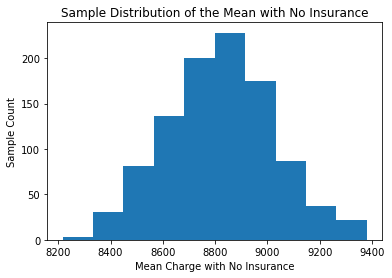

In [40]:
#Create a list with the mean of each resample
no_insurance_mean_list = []
for i in range(1000):
    no_insurance_mean_list.append(np.mean(no_insurance_charges_sampler(1000)))

#Create a list with the standard deviation of each resample
no_insurance_std_dev_list = []
for i in range(1000):
    no_insurance_std_dev_list.append(np.std(no_insurance_charges_sampler(1000)))
    
#Create a list with the standard error of each resample
no_insurance_std_error_list = []
for x in no_insurance_std_dev_list:
    no_insurance_std_error_list.append(x/(np.sqrt(sample1000_n - 1)))
    
    
_ = plt.hist(no_insurance_mean_list)
_ = plt.xlabel('Mean Charge with No Insurance')
_ = plt.ylabel('Sample Count')
_ = plt.title('Sample Distribution of the Mean with No Insurance')  

#This is the mean of the sample distribution
no_insurance_sample_distribution_mean = np.mean(no_insurance_mean_list)
no_insurance_sample_distribution_mean
print('Mean of the Sample Distribution of Means with No Insurance: ' + str(no_insurance_sample_distribution_mean))


#The average standard deviation of sample distribution
no_insurance_sample_distribution_std_dev_mean = np.mean(no_insurance_std_dev_list)
print('Mean Standard Deviation of the Sample Distribution with No Insurance: ' +str(no_insurance_sample_distribution_std_dev_mean))


#Sample distribution size
no_insurance_sample_distribution_n = len(no_insurance_mean_list)
print('Size of Sample Distribution with Insurance: ' +str(no_insurance_sample_distribution_n))


#Sample distribution standard error 
no_insurance_sample_distribution_std_error = no_insurance_sample_distribution_std_dev_mean/(np.sqrt(no_insurance_sample_distribution_n - 1))
print('Standard Error of Sample Distribution with Insurance: ' + str(no_insurance_sample_distribution_std_error))

#95% Confidence interval
no_insurance_sample_distribution_confidence_interval = norm.interval(alpha = .95, loc = no_insurance_sample_distribution_mean, scale = no_insurance_sample_distribution_std_error)
print('Confidence Interval: ' + str(no_insurance_sample_distribution_confidence_interval))




In [41]:
#This is the mean of the sample distribution
insurance_sample_distribution_mean = np.mean(insurance_mean_list)
insurance_sample_distribution_mean
print('Mean of the Sample Distribution of Means with Insurance: ' + str(insurance_sample_distribution_mean))

#This is the mean of the sample distribution
no_insurance_sample_distribution_mean = np.mean(no_insurance_mean_list)
no_insurance_sample_distribution_mean
print('Mean of the Sample Distribution of Means with No Insurance: ' + str(no_insurance_sample_distribution_mean))

Mean of the Sample Distribution of Means with Insurance: 16428.696461456453
Mean of the Sample Distribution of Means with No Insurance: 8821.37478313873


In [45]:
stats.ttest_ind(insurance_mean_list, no_insurance_mean_list, equal_var=True)

Ttest_indResult(statistic=496.35439929945943, pvalue=0.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test